<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/lab1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pirmos 5 eilutės:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Informacija apie duomenis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Trūkstamos reikšmės:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0

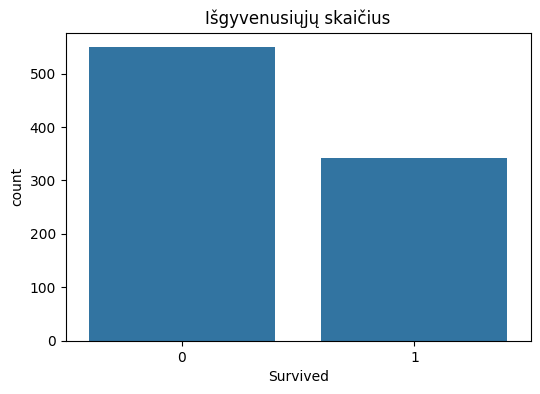

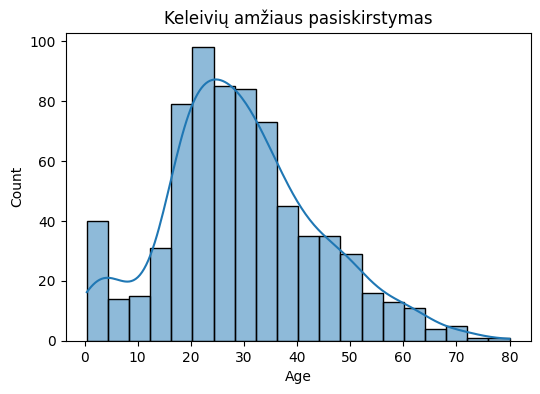

In [7]:
# --- 1 ŽINGSNIS: GET FAMILIAR WITH THE DATA (2 pts) ---

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Įkeliame duomenis
df = pd.read_csv('Titanic.csv')

print("Pirmos 5 eilutės:")
display(df.head())

print("\nInformacija apie duomenis:")
print(df.info())

print("\nTrūkstamos reikšmės:")
print(df.isnull().sum())

# Vizualizacija: Išgyvenusiųjų pasiskirstymas
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Išgyvenusiųjų skaičius')
plt.show()

# Vizualizacija: Amžiaus histograma
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Keleivių amžiaus pasiskirstymas')
plt.show()

In [8]:
# --- 2 ŽINGSNIS: DEAL WITH THE MISSING VALUES (1 pts) ---
# Strategija:
# - Age: Pildome mediana (nes yra išskirčių)
# - Embarked: Pildome moda (dažniausia reikšme)
# - Cabin: Šaliname stulpelį (nes trūksta >75% duomenų)

# Pildome Age
imputer_age = SimpleImputer(strategy='median')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# Pildome Embarked
imputer_embarked = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer_embarked.fit_transform(df[['Embarked']]).ravel()

# Šaliname Cabin (jei dar yra)
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Patikriname
print("\nTrūkstamos reikšmės po tvarkymo:")
print(df.isnull().sum())


Trūkstamos reikšmės po tvarkymo:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


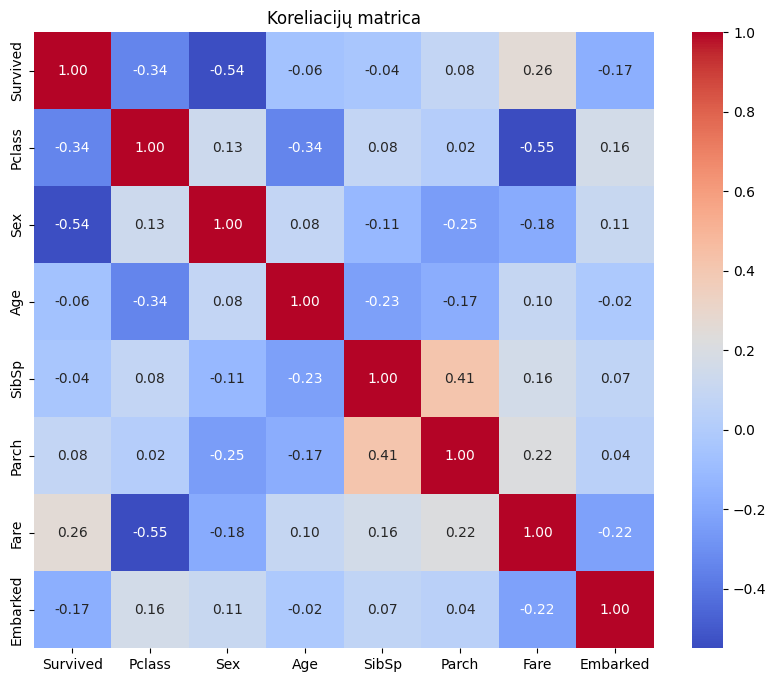

In [9]:
# --- 3 ŽINGSNIS: CORRELATIONS (2 pts) ---
# Kad paskaičiuotume koreliacijas, tekstinius duomenis (Sex, Embarked)
# laikinai paverčiame skaičiais. Taip pat atmetame ID ir Vardus.

# Pasidarome kopiją koreliacijoms
df_corr = df.copy()

# Koduojame kategorinius kintamuosius
le = LabelEncoder()
df_corr['Sex'] = le.fit_transform(df_corr['Sex'])
df_corr['Embarked'] = le.fit_transform(df_corr['Embarked'])

# Atmetame nereikalingus stulpelius
drop_cols = ['PassengerId', 'Name', 'Ticket']
df_corr = df_corr.drop(columns=[c for c in drop_cols if c in df_corr.columns])

# Skaičiuojame koreliacijų matricą
correlation_matrix = df_corr.corr()

# Atvaizduojame
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Koreliacijų matrica')
plt.show()

# Pritaikome pakeitimus pagrindiniam 'df' (kad galėtume tęsti darbą)
# Tačiau čia naudojame One-Hot Encoding 'Embarked' stulpeliui (geriau ML modeliams)
df.drop(columns=[c for c in drop_cols if c in df.columns], inplace=True)
df['Sex'] = le.fit_transform(df['Sex']) # 0/1
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # One-Hot

In [10]:
# --- 4 ŽINGSNIS: NORMALIZE OR STANDARDIZE DATA (1 pts) ---
# Normalizuojame skaitinius stulpelius: 'Age' ir 'Fare'
scaler = MinMaxScaler()
cols_to_scale = ['Age', 'Fare']

# Išsaugome originalius stulpelių pavadinimus
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\nDuomenys po normalizavimo (pirmos 5 eilutės):")
print(df[cols_to_scale].head())


Duomenys po normalizavimo (pirmos 5 eilutės):
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


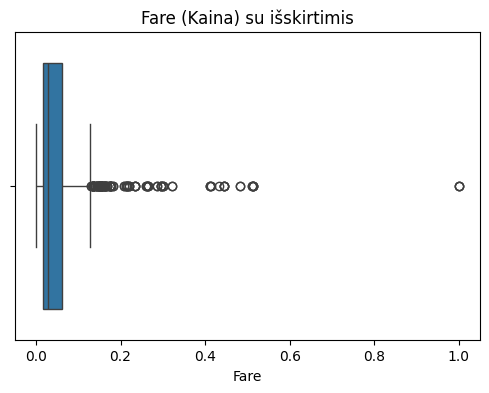


Pašalinta eilučių (outliers): 116


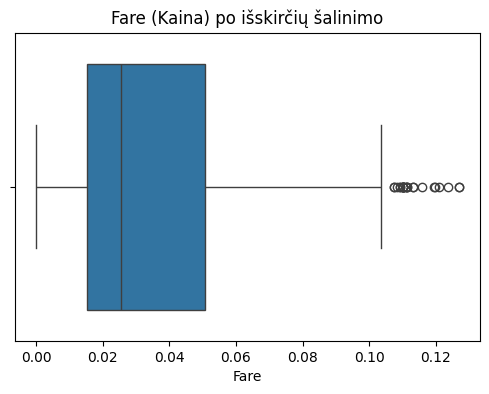

In [11]:
# --- 5 ŽINGSNIS: CHECK FOR OUTLIERS (2 pts) ---
# Tikriname 'Fare' (kainos) stulpelį
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Fare'])
plt.title('Fare (Kaina) su išskirtimis')
plt.show()

# Šaliname išskirtis naudodami IQR metodą
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rows_before = len(df)
df_clean = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]
print(f"\nPašalinta eilučių (outliers): {rows_before - len(df_clean)}")

# Vizualizuojame po pašalinimo
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_clean['Fare'])
plt.title('Fare (Kaina) po išskirčių šalinimo')
plt.show()

In [12]:
# --- 6 ŽINGSNIS: TRAIN/TEST SPLIT (1 pts) ---
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nMokymo aibė (Train): {X_train.shape}")
print(f"Testavimo aibė (Test): {X_test.shape}")


Mokymo aibė (Train): (620, 8)
Testavimo aibė (Test): (155, 8)


In [13]:
# --- 7 ŽINGSNIS: SAVE TO FILE (1 pts) ---
# Išsaugome sutvarkytą duomenų rinkinį
df_clean.to_csv('titanic_cleaned.csv', index=False)
print("\nFailas 'titanic_cleaned.csv' sėkmingai išsaugotas.")


Failas 'titanic_cleaned.csv' sėkmingai išsaugotas.
